In [130]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

benchmarkVersion = "test-all-2025-09-29/run"

rootDir = "/workspaces/promptpex/"

if not os.path.isdir(rootDir):
    rootDir = ".."

evalsDir = f'{rootDir}/evals/{benchmarkVersion}/'


benchmarks = [
    "speech-tag"
]

# full list
benchmarks = [ "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", "shakespearean-writing-assistant"]


benchmarks = [
    "bayesian_games_29_7",
    "bullet_journaling_145_1",
    "canopy_management_298_8",
    "fancy_title_generator",
    "hearing_impairments_124_7",
    "housing_market_dynamics_338_1",
    "initial_public_offerings_ipos_70_9",
    "news_broadcasting_693_9",
    "prompt_generator",
    "real_time_analytics_609_2",
    "recruiter",
    "restaurant_owner",
    "sewing_951_7",
    "solr_search_engine",
    "speaker_identification_595_2",
    "startup_idea_generator",
    "tea_taster",
    "virtual_fitness_coach",
    "yes_or_no_answer",
    "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", "shakespearean-writing-assistant",
"modular_arithmetic_26_4",
"sleep_hygiene_174_3",
"supply_chain_risk_management_347_8",
"supporting_homework_and_study_habits_547_7",
"decentralized_finance_defi_937_2",
"fashion_brand_marketing_strategies_889_3",
"kombucha_brewing_479_10",
"smart_security_systems_554_2",
"autism_spectrum_disorder_124_2",
"sleep_hygiene_practices_163_4",
"virtual_fitness_coach",
"dentist",
"personal_stylist",
"developer_relations_consultant",
"biblical_translator",
"ai_assisted_doctor",
"web_design_consultant",
"public_speaking_coach",
"buddha",
"screenwriter",
]

benchmarks = [
"startup_idea_generator",
"tea_taster",
"recruiter",
"yes_or_no_answer",
"virtual_fitness_coach",
"fancy_title_generator",
"restaurant_owner",
"prompt_generator",
"solr_search_engine",
"sewing_951_7",
"hearing_impairments_124_7",
"speaker_identification_595_2",
] 

benchmarks = [ "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", 
"sewing_951_7",
"hearing_impairments_124_7",
"speaker_identification_595_2",
"real_time_analytics_609_2",
"housing_market_dynamics_338_1",]

benchmarks = [ "speech-tag",  ]

benchmarks = [ "speech-tag", "classify-input-text",  "sentence-rewrite", "extract-names", "elements", "art-prompt", "shakespearean-writing-assistant" ]


benchmarks = [ "speech-tag",  ]

              
benchmarks = [
"crewai_assistant_qqtuuwsby",
"fragrance_finder_deluxe_e9avvjxcw",
"information_kiosk_building_j6ry5iscb",
"thread_weaver_krog0f5tg",
"hurtig_ingeni_r_pgktzdcfk",

    "speech-tag",
    "text-to-p",
    "elements",
    "art-prompt",
    "extract-names",
    "classify-input-text",
    "sentence-rewrite",
    "shakespearean-writing-assistant",

"architect_guide_for_programmers",
"unconstrained_ai_model_dan",
"idea_clarifier_gpt",
"structured_iterative_reasoning_protocol_sirp",
"tech_challenged_customer",

"learning_coach",
"writing_editor",
"coding_partner",
"brainstormer",
"career_guide",

"synonym_finder",
"instructor_in_a_school",
"dev_helper_upyxwdlcg",
"url_to_business_plan_a3znu5fsn",
"prompt_creator_8ope0amfj"
]


benchmark = benchmarks[0]

prettyBenchmarkNames = { "speech-tag": "speech-tag", 
                "text-to-p": "text-to-p",  
                "shakespearean-writing-assistant": "shakespeare", 
                "sentence-rewrite": "sentence", 
                "extract-names": "extract-names", 
                "elements":"elements", 
                "art-prompt": "art-prompt", 
                "classify-input-text": "classify"}

prettyMetrics = { "tests compliant": "prompt ok/err", 
                "system_compliant": "prompt only",  
                "rules_system_with_input_compliant": "prompt/rule/input"
}

def parse_metric(val):
    """Convert metric to float, handle %, NaN, and '--'."""
    if isinstance(val, str):
        val = val.strip()
        if val.endswith('%'):
            try:
                return float(val.strip('%'))
            except:
                return 0.0
        if val in ('NaN', '--', ''):
            return 0.0
    try:
        v = float(val)
        if np.isnan(v):
            return 0.0
        return v
    except:
        return 0.0

def get_metrics_start_col(df):
    """Get the start column index for metrics (after 'tests valid compliant')."""
    df.columns = df.columns.str.strip()  # Strip whitespace from column names
    print("DataFrame columns:", df.columns.tolist())
    
    start_col = len(df.columns)  # Default to end of columns (no metrics)
    
    if 'tests valid compliant' in df.columns:
        start_col = df.columns.get_loc('tests valid compliant') + 1
    elif 'tests negative compliant' in df.columns:
        start_col = df.columns.get_loc('tests negative compliant') + 1
    elif 'tests positive compliant' in df.columns:
        start_col = df.columns.get_loc('tests positive compliant') + 1
    elif 'model' in df.columns:
        # Fallback: assume metrics start after 'model' column
        start_col = df.columns.get_loc('model') + 1
    
    # Ensure start_col doesn't exceed the number of columns
    return min(start_col, len(df.columns))

    
def analyze_benchmark_metrics(benchmark, evalsDir, prettyBenchmarkNames):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    # Build the path to the overview.csv for the given benchmark
    csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
    
    if not os.path.isfile(csv_path):
        print(f"Warning: {csv_path} not found, skipping benchmark '{benchmark}'.")
        return

    # Read the CSV
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"Error reading {csv_path}: {e}")
        return

    # Get the start column for metrics
    start_col = get_metrics_start_col(df)

    # Check if there are any metrics columns
    if start_col >= len(df.columns):
        print(f"No metrics columns found for benchmark '{benchmark}'. Available columns: {df.columns.tolist()}")
        return

    # Include "tests compliant" as a metric (ensure it's included)
    metrics = list(df.columns[start_col:])
    
    if not metrics:
        print(f"No metrics found for benchmark '{benchmark}'.")
        return

    # Extract model names and metrics columns
    if 'model' not in df.columns:
        print(f"No 'model' column found in {csv_path}")
        return
        
    models = df['model']
    
    if len(models) == 0:
        print(f"No models found for benchmark '{benchmark}'.")
        return
    
    metrics_table = df[['model'] + metrics].copy()

    for metric in metrics:
        metrics_table[metric] = metrics_table[metric].apply(parse_metric)

    print(f"Metrics by Model for benchmark '{benchmark}':")
    print(metrics_table.to_string(index=False))

    # Plot grouped bar chart
    x = np.arange(len(models))
    width = 0.8 / len(metrics)  # total width for all bars per group

    fig, ax = plt.subplots(figsize=(14, 6))
    for i, metric in enumerate(metrics):
        ax.bar(x + i*width, metrics_table[metric], width, label=metric)

    ax.set_xticks(x + width*(len(metrics)-1)/2)
    ax.set_xticklabels(models, rotation=20)
    ax.set_ylabel('Metric Value')
    ax.set_title(f"Model Metrics for {prettyBenchmarkNames.get(benchmark, benchmark)}")
    ax.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()

# Example usage:
analyze_benchmark_metrics(benchmark, evalsDir, prettyBenchmarkNames)

DataFrame columns: ['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant']
No metrics columns found for benchmark 'crewai_assistant_qqtuuwsby'. Available columns: ['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant']


In [131]:
def collect_metrics(benchmarks, evalsDir):
    # Data structure: {benchmark: {model: {metric: value}}}
    all_data = {}
    all_metrics = set()
    all_models = set()

    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
        df = pd.read_csv(csv_path)
        
        # Get the start column for metrics
        start_col = get_metrics_start_col(df)

        # Check if there are any metrics columns
        if start_col >= len(df.columns):
            print(f"No metrics columns found for benchmark '{benchmark}', skipping.")
            continue

        # Include "tests compliant" as a metric (ensure it's included)
        metrics = list(df.columns[start_col:])
        
        if not metrics:
            print(f"No metrics found for benchmark '{benchmark}', skipping.")
            continue

        all_metrics.update(metrics)
        all_data[benchmark] = {}
        for _, row in df.iterrows():
            model = row['model']
            all_models.add(model)
            all_data[benchmark].setdefault(model, {})
            for metric in metrics:
                all_data[benchmark][model][metric] = parse_metric(row[metric])
    return all_data, sorted(all_models), sorted(all_metrics)

def compute_model_metric_averages(all_data, all_models, all_metrics):
    if not all_metrics:
        print("No metrics available for computation.")
        return {}
    
    # {model: {metric: [values...]}}
    model_metric_values = {model: {metric: [] for metric in all_metrics} for model in all_models}
    for benchmark in all_data:
        for model in all_models:
            model_metrics = all_data[benchmark].get(model, {})
            for metric in all_metrics:
                val = model_metrics.get(metric, 0.0)
                model_metric_values[model][metric].append(val)
    # Compute averages
    model_metric_avg = {model: {metric: np.mean(vals) for metric, vals in metrics.items()} for model, metrics in model_metric_values.items()}
    return model_metric_avg

def print_metric_table(model_metric_avg):
    if not model_metric_avg:
        print("No metric data available to display.")
        return
    
    models = list(model_metric_avg.keys())
    if not models:
        print("No models found.")
        return
    
    # Check if any model has metrics
    first_model_metrics = model_metric_avg[models[0]]
    if not first_model_metrics:
        print("No metrics found for any model.")
        return
    
    metrics = list(first_model_metrics.keys())
    print("Average Metrics by Model:")
    header = ["Model"] + [prettyMetrics.get(m, m) for m in metrics]
    
    print("\t".join(header))
    for model in models:
        row = [model] + [f"{model_metric_avg[model][metric]:.2f}" for metric in metrics]
        print("\t".join(row))

def plot_grouped_bar_chart(model_metric_avg):
    if not model_metric_avg:
        print("No metric data available for plotting.")
        return
    
    models = list(model_metric_avg.keys())
    if not models:
        print("No models found for plotting.")
        return
    
    # Check if any model has metrics
    first_model_metrics = model_metric_avg[models[0]]
    if not first_model_metrics:
        print("No metrics found for plotting.")
        return
    
    metrics = list(first_model_metrics.keys())
    if len(metrics) == 0:
        print("No metrics available for plotting.")
        return
    
    x = np.arange(len(models))
    width = 0.8 / len(metrics)
    fig, ax = plt.subplots(figsize=(14, 6))
    for i, metric in enumerate(metrics):
        values = [model_metric_avg[model][metric] for model in models]
        ax.bar(x + i*width, values, width, label=metric)
    ax.set_xticks(x + width*(len(metrics)-1)/2)
    ax.set_xticklabels(models, rotation=20)
    ax.set_ylabel('Average Metric Value')
    ax.set_title('Average Model Metrics Across Benchmarks')
    ax.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()



all_data, all_models, all_metrics = collect_metrics(benchmarks, evalsDir)

if not all_metrics:
    print("No metrics found across all benchmarks. Cannot proceed with analysis.")
elif not all_models:
    print("No models found across all benchmarks. Cannot proceed with analysis.")
else:
    model_metric_avg = compute_model_metric_averages(all_data, all_models, all_metrics)
    print_metric_table(model_metric_avg)
    plot_grouped_bar_chart(model_metric_avg)

DataFrame columns: ['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant']
No metrics columns found for benchmark 'crewai_assistant_qqtuuwsby', skipping.
DataFrame columns: ['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant']
No metrics columns found for benchmark 'fragrance_finder_deluxe_e9avvjxcw', skipping.
DataFrame columns: ['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant']
No metrics columns found for benchmark 'information_kiosk_building_j6ry5iscb', skipping.
DataFrame columns: ['model', 'tests', 'tests compliant', 'baseline compliant'

In [132]:
def print_benchmark_model_metrics_table(benchmarks, evalsDir, columns_of_interest):
    import os
    import pandas as pd
    
    width = 18
    def fit(val):
        s = str(val)
        return s[:width].ljust(width)[:width] 
    
    header = ["Benchmark", "Model"] + [
        prettyMetrics.get(col, col) for col in columns_of_interest
    ]

    print("".join([fit(h) for h in header]))
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            continue
        df = pd.read_csv(csv_path)

        for _, row in df.iterrows():
            model = row['model']
            values = []
            for col in columns_of_interest:
                val0 = row.get(col, 0)
                val = parse_metric(val0)
                values.append(f"{val:.2f}")
            print("".join([fit(benchmark), fit(model)] + [fit(v) for v in values]))

# read csv for first benchmark
csv_path = os.path.join(evalsDir, benchmarks[0], benchmarks[0], "overview.csv")
df = pd.read_csv(csv_path)

# Get the start column for metrics
start_col = get_metrics_start_col(df)

# columns_of_interest = ["tests", "tests compliant", "errors", "tests compliance unknown"] + list(df.columns[start_col:])
columns_of_interest = list(df.columns[start_col:])

print_benchmark_model_metrics_table(benchmarks, evalsDir, columns_of_interest)

DataFrame columns: ['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant']
Benchmark         Model             
crewai_assistant_qgemma2:9b         
crewai_assistant_qqwen2.5:3b        
crewai_assistant_qgpt-oss           
crewai_assistant_qllama3.2:1b       
fragrance_finder_dgemma2:9b         
fragrance_finder_dqwen2.5:3b        
fragrance_finder_dgpt-oss           
fragrance_finder_dllama3.2:1b       
information_kiosk_gemma2:9b         
information_kiosk_qwen2.5:3b        
information_kiosk_gpt-oss           
information_kiosk_llama3.2:1b       
thread_weaver_kroggemma2:9b         
thread_weaver_krogqwen2.5:3b        
thread_weaver_kroggpt-oss           
thread_weaver_krogllama3.2:1b       
hurtig_ingeni_r_pggemma2:9b         
hurtig_ingeni_r_pgqwen2.5:3b        
hurtig_ingeni_r_pggpt-oss           
hurtig_ingeni_r_pgllama3.2:1b       


In [133]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def collect_and_sum_benchmark_metrics(benchmarks, evalsDir, columns_of_interest):
    # data[benchmark][model][column]
    data = {}
    sums = {bench: {col: 0.0 for col in columns_of_interest} for bench in benchmarks}
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()  # Strip whitespace from column names
        data[benchmark] = {}
        for _, row in df.iterrows():
            model = row['model']
            data[benchmark][model] = {}
            for col in columns_of_interest:
                val = parse_metric(row.get(col, 0))
                data[benchmark][model][col] = val
                sums[benchmark][col] += val
    return data, sums

def print_sums_table(sums, columns_of_interest):
    print("Benchmark\t" + "\t".join(columns_of_interest))
    for bench, colvals in sums.items():
        row = [bench] + [f"{colvals[col]:.2f}" for col in columns_of_interest]
        print("\t".join(row))

def plot_sums_bar(sums, columns_of_interest):
    benchmarks = list(sums.keys())
    for col in columns_of_interest:
        values = [sums[bench][col] for bench in benchmarks]
        plt.figure(figsize=(10, 5))
        plt.bar(benchmarks, values)
        plt.ylabel(col)
        plt.title(f"Sum of {col} by Benchmark")
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()

# columns_of_interest = ["errors", "tests compliance unknown"]
# Get the start column for metrics
start_col = get_metrics_start_col(df)

# columns_of_interest = ["tests", "tests compliant", "errors", "tests compliance unknown"] + list(df.columns[start_col:])
columns_of_interest = list(df.columns[start_col:])

data, sums = collect_and_sum_benchmark_metrics(benchmarks, evalsDir, columns_of_interest)
print_sums_table(sums, columns_of_interest)
plot_sums_bar(sums, columns_of_interest)

DataFrame columns: ['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant']
Benchmark	
crewai_assistant_qqtuuwsby
fragrance_finder_deluxe_e9avvjxcw
information_kiosk_building_j6ry5iscb
thread_weaver_krog0f5tg
hurtig_ingeni_r_pgktzdcfk
speech-tag
text-to-p
elements
art-prompt
extract-names
classify-input-text
sentence-rewrite
shakespearean-writing-assistant
architect_guide_for_programmers
unconstrained_ai_model_dan
idea_clarifier_gpt
structured_iterative_reasoning_protocol_sirp
tech_challenged_customer
learning_coach
writing_editor
coding_partner
brainstormer
career_guide
synonym_finder
instructor_in_a_school
dev_helper_upyxwdlcg
url_to_business_plan_a3znu5fsn
prompt_creator_8ope0amfj


Benchmark	Average Tests per Model
crewai_assistant_qqtuuwsby	20.00
fragrance_finder_deluxe_e9avvjxcw	20.00
information_kiosk_building_j6ry5iscb	18.00
thread_weaver_krog0f5tg	20.00
hurtig_ingeni_r_pgktzdcfk	20.00
speech-tag	18.00
text-to-p	22.00
elements	40.00
art-prompt	20.00
extract-names	18.00
classify-input-text	14.00
sentence-rewrite	32.00
shakespearean-writing-assistant	8.00
architect_guide_for_programmers	20.00
unconstrained_ai_model_dan	20.00
idea_clarifier_gpt	20.00
structured_iterative_reasoning_protocol_sirp	20.00
tech_challenged_customer	20.00
learning_coach	20.00
writing_editor	20.00
coding_partner	20.00
brainstormer	20.00
career_guide	20.00
synonym_finder	24.00
instructor_in_a_school	28.00
dev_helper_upyxwdlcg	14.00
url_to_business_plan_a3znu5fsn	14.00
prompt_creator_8ope0amfj	36.00


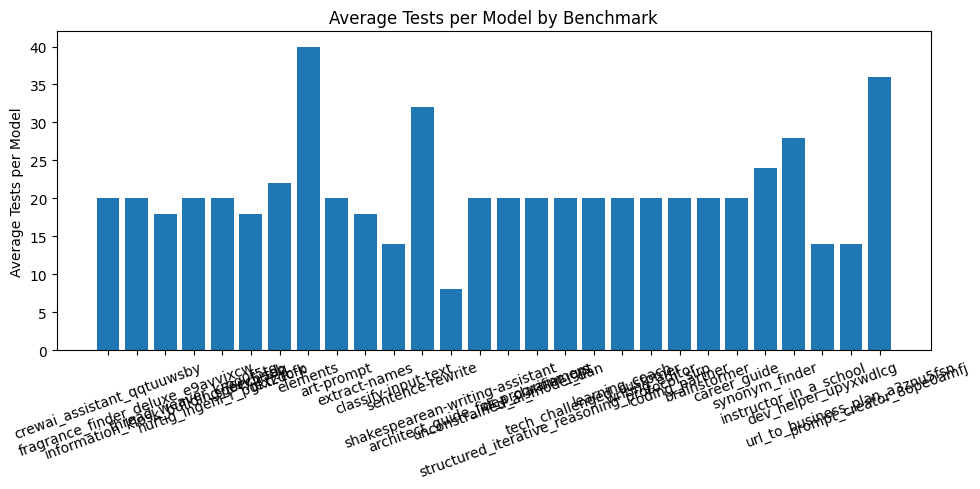

In [134]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def average_tests_per_model(benchmarks, evalsDir):
    averages = {}
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()
        # Parse the 'tests' column for all models
        tests = df['tests'].apply(parse_metric)
        if len(tests) > 0:
            avg = np.mean(tests)
        else:
            avg = 0.0
        averages[benchmark] = avg
    return averages

def print_avg_table(averages):
    print("Benchmark\tAverage Tests per Model")
    for bench, avg in averages.items():
        print(f"{bench}\t{avg:.2f}")

def plot_avg_bar(averages):
    benchmarks = list(averages.keys())
    values = list(averages.values())
    plt.figure(figsize=(10, 5))
    plt.bar(benchmarks, values)
    plt.ylabel("Average Tests per Model")
    plt.title("Average Tests per Model by Benchmark")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()



averages = average_tests_per_model(benchmarks, evalsDir)
print_avg_table(averages)
plot_avg_bar(averages)

Available columns:
['model', 'tests', 'tests compliant', 'baseline compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'baseline', 'tests valid', 'tests valid compliant']

Plotting column: tests compliant


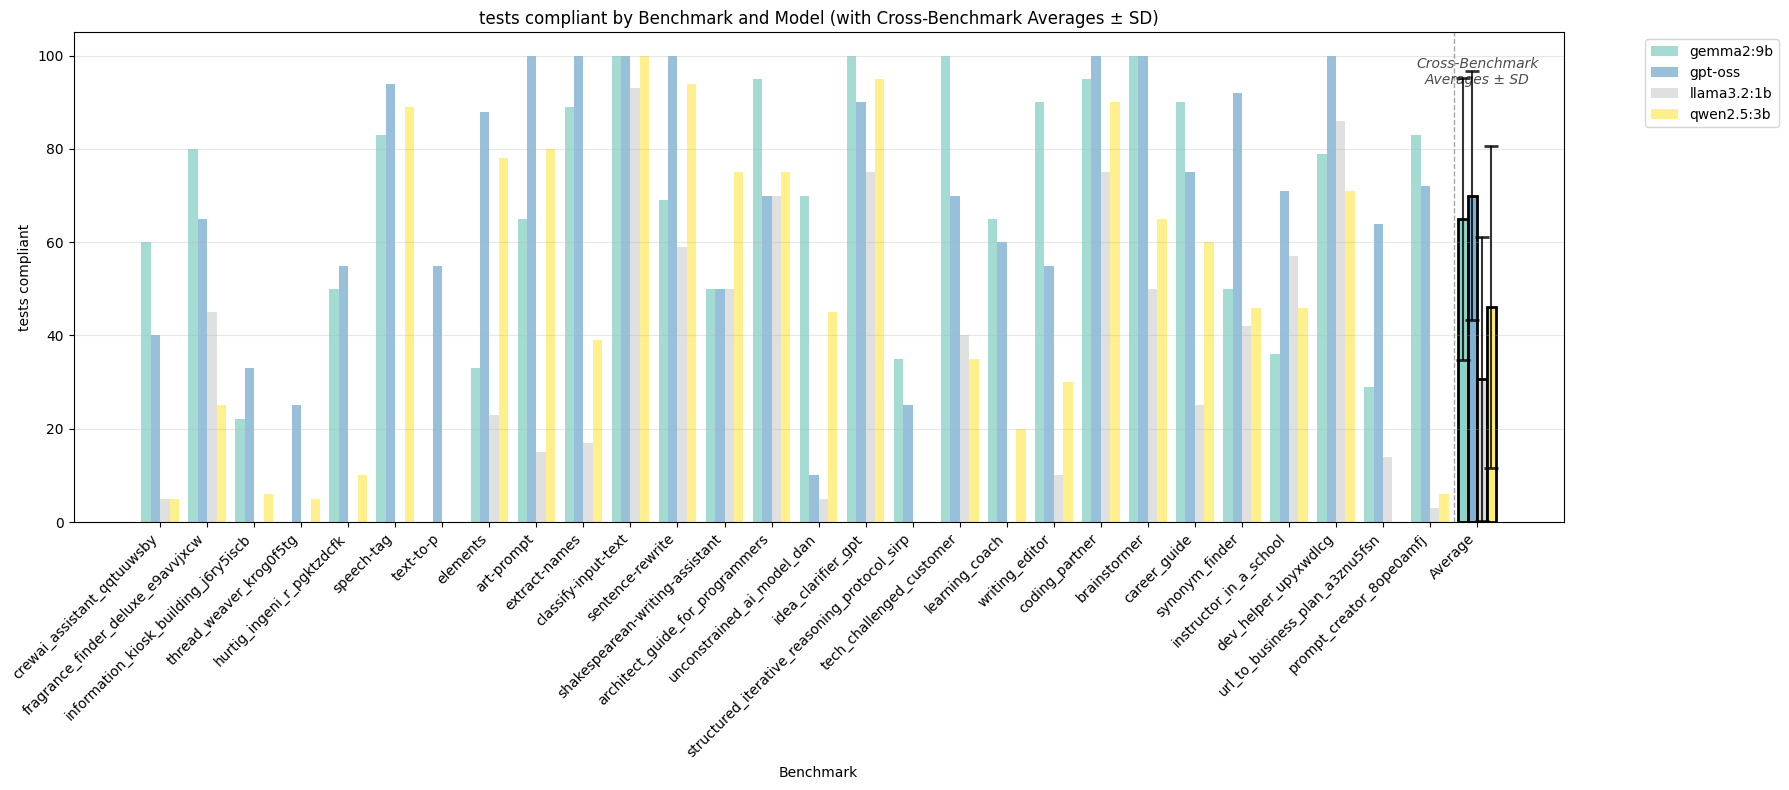


Model Statistics for tests compliant (including zeros):
gemma2:9b: 64.93 ± 30.24
gpt-oss: 69.96 ± 26.71
llama3.2:1b: 30.68 ± 30.42
qwen2.5:3b: 46.07 ± 34.53
Plotting column: accuracy with azure:o4-mini_2025-04-16
No valid data found for any benchmarks for column 'accuracy with azure:o4-mini_2025-04-16'.


In [135]:
def plot_grouped_barplot_by_benchmark_and_model(benchmarks, evalsDir, column_of_interest):
    """
    Create a grouped barplot showing a specific column as a function of benchmark and model.
    Groups are benchmarks, bars within groups are models.
    Includes an additional "Average" group showing averages across benchmarks for each model.
    """
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Data structure: {benchmark: {model: value}}
    data = {}
    all_models = set()
    
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
            
        try:
            df = pd.read_csv(csv_path)
            df.columns = df.columns.str.strip()
        except Exception as e:
            print(f"Error reading {csv_path}: {e}")
            continue
        
        if "model" not in df.columns:
            print(f"Warning: 'model' column not found in {csv_path}, skipping.")
            continue
            
        if column_of_interest not in df.columns:
            print(f"Warning: '{column_of_interest}' column not found in {csv_path}, skipping.")
            continue
            
        data[benchmark] = {}
        for _, row in df.iterrows():
            model = row["model"]
            val = parse_metric(row[column_of_interest])
            data[benchmark][model] = val
            all_models.add(model)
    
    all_models = sorted(all_models)
    benchmarks_with_data = [b for b in benchmarks if b in data and data[b]]
    
    if not benchmarks_with_data:
        print(f"No valid data found for any benchmarks for column '{column_of_interest}'.")
        return
        
    if not all_models:
        print(f"No models found across all benchmarks for column '{column_of_interest}'.")
        return

    # Build data matrix: rows=benchmarks, columns=models
    values = []
    for benchmark in benchmarks_with_data:
        row = []
        for model in all_models:
            row.append(data.get(benchmark, {}).get(model, 0.0))
        values.append(row)
    values = np.array(values)  # shape: (num_benchmarks, num_models)
    
    # Check if we have any non-zero values
    if np.all(values == 0):
        print(f"All values are zero for column '{column_of_interest}'. No meaningful plot can be created.")
        return

    # Calculate averages and standard deviations across benchmarks for each model
    model_averages = []
    model_std_devs = []
    for i, model in enumerate(all_models):
        # Get values for this model across all benchmarks
        model_values = values[:, i]


        # Include ALL values (including zeros) for statistics
        avg = np.mean(model_values)
        std = np.std(model_values, ddof=1) if len(model_values) > 1 else 0.0
        model_averages.append(avg)
        model_std_devs.append(std)
    
    # Add the average row to the data
    all_values = np.vstack([values, model_averages])
    all_labels = benchmarks_with_data + ["Average"]
    
    # Create the grouped bar plot
    x = np.arange(len(all_labels))  # positions for all groups including average
    width = 0.8 / len(all_models)  # width of individual bars
    
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Create bars for each model
    colors = plt.cm.Set3(np.linspace(0, 1, len(all_models)))  # Use distinct colors
    for i, model in enumerate(all_models):
        offset = (i - (len(all_models) - 1) / 2) * width
        bars = ax.bar(x + offset, all_values[:, i], width, label=model, alpha=0.8, color=colors[i])
        
        # Add error bars only to the average (last) bar
        if len(bars) > len(benchmarks_with_data):
            # Highlight the average bars with different styling
            bars[-1].set_alpha(1.0)  # Make average bar more opaque
            bars[-1].set_edgecolor('black')  # Add black border to average bar
            bars[-1].set_linewidth(2)
            
            # Add error bar to the average bar
            avg_x_pos = x[-1] + offset
            avg_height = model_averages[i]
            error_bar = model_std_devs[i]
            
            if error_bar > 0:  # Only add error bar if we have variation
                ax.errorbar(avg_x_pos, avg_height, yerr=error_bar, 
                           fmt='none', color='black', capsize=5, capthick=2, alpha=0.8)
    
    # Add a vertical separator line before the average group
    if len(all_labels) > 1:
        separator_x = len(benchmarks_with_data) - 0.5
        ax.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Customize the plot
    ax.set_xlabel('Benchmark')
    ax.set_ylabel(column_of_interest)
    ax.set_title(f'{column_of_interest} by Benchmark and Model (with Cross-Benchmark Averages ± SD)')
    ax.set_xticks(x)
    ax.set_xticklabels(all_labels, rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add text annotation for the average section
    if len(all_labels) > 1:
        ax.text(len(benchmarks_with_data), ax.get_ylim()[1] * 0.95, 'Cross-Benchmark\nAverages ± SD', 
                ha='center', va='top', fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics including standard deviations
    print(f"\nModel Statistics for {column_of_interest} (including zeros):")
    print("=" * 60)
    for i, model in enumerate(all_models):
        print(f"{model}: {model_averages[i]:.2f} ± {model_std_devs[i]:.2f}")

# Example usage with a specific column
# You can change this to any column that exists in your data
column_to_plot = "tests compliant"

# First check what columns are available in the first benchmark
if benchmarks:  # Check if benchmarks list is not empty
    csv_path = os.path.join(evalsDir, benchmarks[0], benchmarks[0], "overview.csv")
    if os.path.isfile(csv_path):
        try:
            df_sample = pd.read_csv(csv_path)
            df_sample.columns = df_sample.columns.str.strip()
            print("Available columns:")
            print(df_sample.columns.tolist())
            print()
            
            # Try to find a good column to plot
            if "tests compliant" in df_sample.columns:
                column_to_plot = "tests compliant"
            elif "accuracy with eval" in df_sample.columns:
                column_to_plot = "accuracy with eval"
            else:
                # Use the first metric column after standard columns
                start_col = get_metrics_start_col(df_sample)
                
                if start_col < len(df_sample.columns):
                    column_to_plot = df_sample.columns[start_col]
                else:
                    print("No metrics columns found, using 'tests compliant' as default")
                    column_to_plot = "tests compliant"
        except Exception as e:
            print(f"Error reading sample CSV: {e}")
            print("Using default column: tests compliant")
    else:
        print(f"Sample CSV not found: {csv_path}")
        print("Using default column: tests compliant")
else:
    print("No benchmarks specified!")
    print("Using default column: tests compliant")

print(f"Plotting column: {column_to_plot}")
plot_grouped_barplot_by_benchmark_and_model(benchmarks, evalsDir, column_to_plot)

column_to_plot = "accuracy with azure:o4-mini_2025-04-16"
print(f"Plotting column: {column_to_plot}")
plot_grouped_barplot_by_benchmark_and_model(benchmarks, evalsDir, column_to_plot)

BASELINE ANALYSIS
Available columns in baseline data:
['model', 'errors', 'tests', 'tests compliant', 'tests valid']

Plotting baseline column: tests compliant


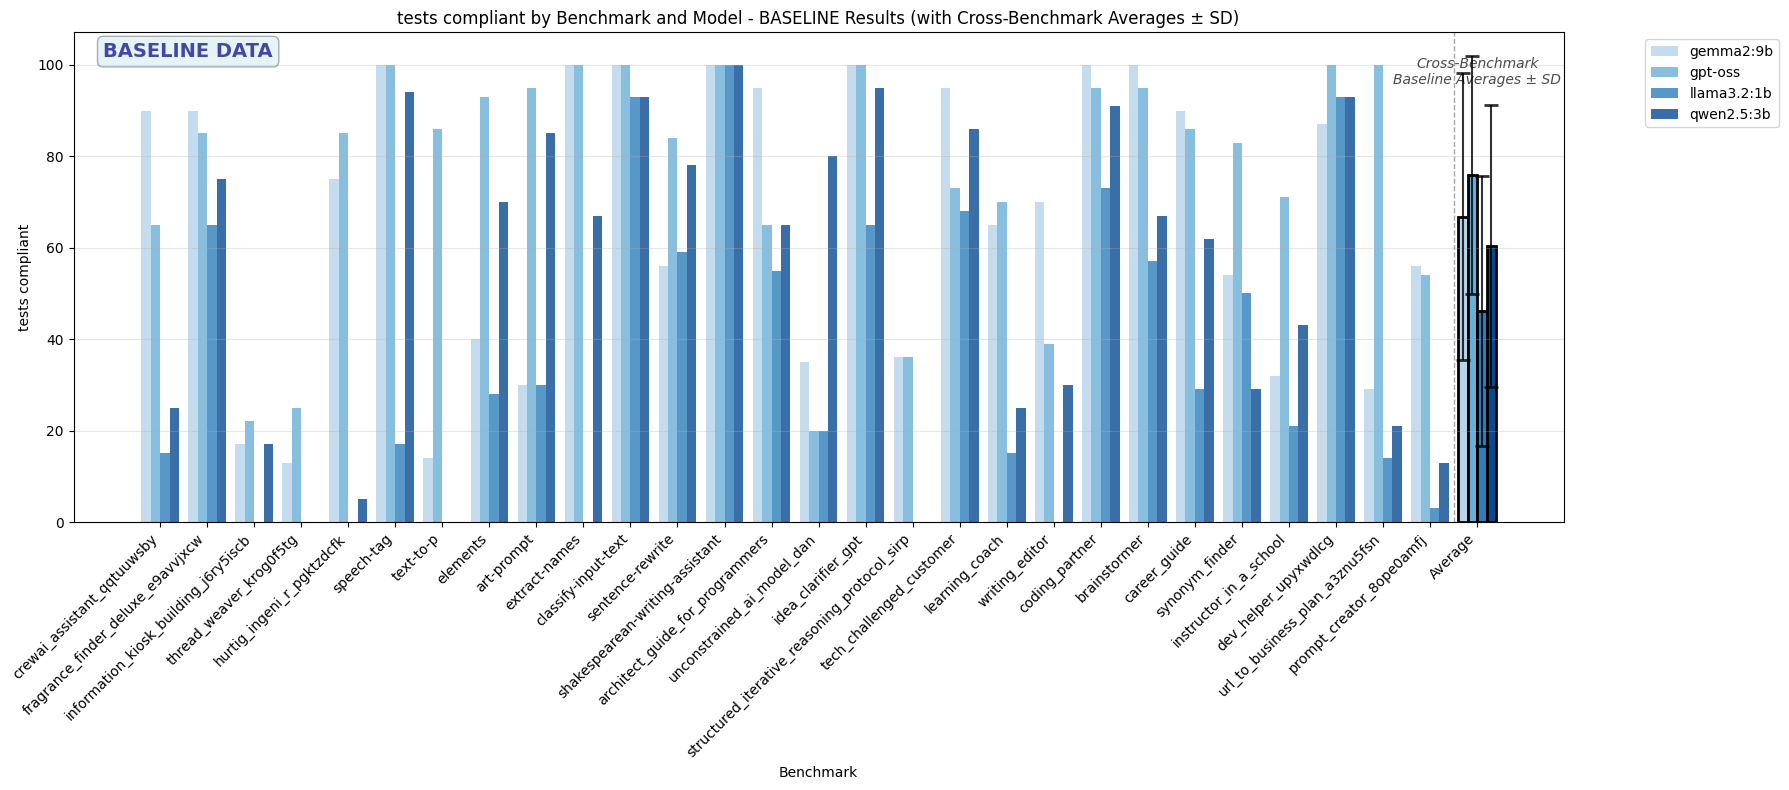


Baseline Model Statistics for tests compliant:
gemma2:9b: 66.75 ± 31.41
gpt-oss: 75.96 ± 26.03
llama3.2:1b: 46.19 ± 29.55
qwen2.5:3b: 60.36 ± 30.82


In [136]:
def plot_grouped_barplot_by_benchmark_and_model_baseline(benchmarks, evalsDir, column_of_interest):
    """
    Create a grouped barplot showing a specific column as a function of benchmark and model for BASELINE tests.
    Groups are benchmarks, bars within groups are models.
    Includes an additional "Average" group showing averages across benchmarks for each model.
    This function reads from overview-baseline.csv files instead of overview.csv files.
    """
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Data structure: {benchmark: {model: value}}
    data = {}
    all_models = set()
    
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()
        
        if "model" not in df.columns or column_of_interest not in df.columns:
            print(f"Warning: Required columns not found in {csv_path}, skipping.")
            continue
            
        data[benchmark] = {}
        for _, row in df.iterrows():
            model = row["model"]
            val = parse_metric(row[column_of_interest])
            data[benchmark][model] = val
            all_models.add(model)
    
    all_models = sorted(all_models)
    benchmarks_with_data = [b for b in benchmarks if b in data]
    
    if not benchmarks_with_data or not all_models:
        print("No baseline data found for plotting.")
        return
    
    # Build data matrix: rows=benchmarks, columns=models
    values = []
    for benchmark in benchmarks_with_data:
        row = []
        for model in all_models:
            row.append(data.get(benchmark, {}).get(model, 0.0))
        values.append(row)
    values = np.array(values)  # shape: (num_benchmarks, num_models)
    
    # Calculate averages and standard deviations across benchmarks for each model
    model_averages = []
    model_std_devs = []
    for i, model in enumerate(all_models):
        # Get values for this model across all benchmarks
        model_values = values[:, i]
        # Only consider non-zero values for statistics
        non_zero_values = model_values[model_values > 0]
        if len(non_zero_values) > 0:
            avg = np.mean(non_zero_values)
            std = np.std(non_zero_values, ddof=1) if len(non_zero_values) > 1 else 0.0
        else:
            avg = 0.0
            std = 0.0
        model_averages.append(avg)
        model_std_devs.append(std)
    
    # Add the average row to the data
    all_values = np.vstack([values, model_averages])
    all_labels = benchmarks_with_data + ["Average"]
    
    # Create the grouped bar plot
    x = np.arange(len(all_labels))  # positions for all groups including average
    width = 0.8 / len(all_models)  # width of individual bars
    
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Create bars for each model with baseline-specific colors (cooler tones)
    colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(all_models)))  # Use blue tones for baseline
    for i, model in enumerate(all_models):
        offset = (i - (len(all_models) - 1) / 2) * width
        bars = ax.bar(x + offset, all_values[:, i], width, label=model, alpha=0.8, color=colors[i])
        
        # Add error bars only to the average (last) bar
        if len(bars) > len(benchmarks_with_data):
            # Highlight the average bars with different styling
            bars[-1].set_alpha(1.0)  # Make average bar more opaque
            bars[-1].set_edgecolor('black')  # Add black border to average bar
            bars[-1].set_linewidth(2)
            
            # Add error bar to the average bar
            avg_x_pos = x[-1] + offset
            avg_height = model_averages[i]
            error_bar = model_std_devs[i]
            
            if error_bar > 0:  # Only add error bar if we have variation
                ax.errorbar(avg_x_pos, avg_height, yerr=error_bar, 
                           fmt='none', color='black', capsize=5, capthick=2, alpha=0.8)
    
    # Add a vertical separator line before the average group
    if len(all_labels) > 1:
        separator_x = len(benchmarks_with_data) - 0.5
        ax.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Customize the plot
    ax.set_xlabel('Benchmark')
    ax.set_ylabel(column_of_interest)
    ax.set_title(f'{column_of_interest} by Benchmark and Model - BASELINE Results (with Cross-Benchmark Averages ± SD)')
    ax.set_xticks(x)
    ax.set_xticklabels(all_labels, rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add text annotation for the average section
    if len(all_labels) > 1:
        ax.text(len(benchmarks_with_data), ax.get_ylim()[1] * 0.95, 'Cross-Benchmark\nBaseline Averages ± SD', 
                ha='center', va='top', fontsize=10, style='italic', alpha=0.7)
    
    # Add watermark indicating this is baseline data
    ax.text(0.02, 0.98, 'BASELINE DATA', transform=ax.transAxes, fontsize=14, 
            color='navy', alpha=0.7, weight='bold', va='top', ha='left',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.3))
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics including standard deviations
    print(f"\nBaseline Model Statistics for {column_of_interest}:")
    print("=" * 60)
    for i, model in enumerate(all_models):
        print(f"{model}: {model_averages[i]:.2f} ± {model_std_devs[i]:.2f}")

# Run the baseline analysis
print("=" * 60)
print("BASELINE ANALYSIS")
print("=" * 60)

# Check what columns are available in the first baseline file
csv_path = os.path.join(evalsDir, benchmarks[0], benchmarks[0], "overview-baseline.csv")
if os.path.isfile(csv_path):
    df_sample = pd.read_csv(csv_path)
    df_sample.columns = df_sample.columns.str.strip()
    print("Available columns in baseline data:")
    print(df_sample.columns.tolist())
    print()
    
    # Plot baseline results for tests compliant
    if "tests compliant" in df_sample.columns:
        column_to_plot = "tests compliant"
        print(f"Plotting baseline column: {column_to_plot}")
        plot_grouped_barplot_by_benchmark_and_model_baseline(benchmarks, evalsDir, column_to_plot)
    
    # Plot baseline results for accuracy with eval
    if "accuracy with eval" in df_sample.columns:
        column_to_plot = "accuracy with azure:o4-mini_2025-04-16"
        print(f"Plotting baseline column: {column_to_plot}")
        plot_grouped_barplot_by_benchmark_and_model_baseline(benchmarks, evalsDir, column_to_plot)
else:
    print(f"Warning: No baseline file found at {csv_path}")
    print("Available baseline files:")
    for benchmark in benchmarks:
        baseline_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
        if os.path.isfile(baseline_path):
            print(f"  Found: {baseline_path}")
        else:
            print(f"  Missing: {baseline_path}")

In [137]:
def compare_baseline_vs_main_metrics(benchmark, evalsDir, prettyBenchmarkNames=None):
    """
    Compare metrics between overview.csv and overview-baseline.csv files for a given benchmark.
    Creates side-by-side bar charts and difference analysis.
    """
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Build paths to both CSV files
    main_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
    baseline_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
    
    # Check if both files exist
    if not os.path.isfile(main_csv_path):
        print(f"Warning: Main file {main_csv_path} not found, skipping.")
        return
    if not os.path.isfile(baseline_csv_path):
        print(f"Warning: Baseline file {baseline_csv_path} not found, skipping.")
        return
    
    # Read both CSV files
    main_df = pd.read_csv(main_csv_path)
    baseline_df = pd.read_csv(baseline_csv_path)
    
    # Strip whitespace from column names
    main_df.columns = main_df.columns.str.strip()
    baseline_df.columns = baseline_df.columns.str.strip()
    
    # Find common models
    main_models = set(main_df['model'])
    baseline_models = set(baseline_df['model'])
    common_models = sorted(main_models.intersection(baseline_models))
    
    if not common_models:
        print(f"No common models found between main and baseline for benchmark '{benchmark}'")
        return
    
    # Find common metric columns (excluding 'model' and other non-metric columns)
    main_start_col = get_metrics_start_col(main_df)
    baseline_start_col = get_metrics_start_col(baseline_df)
    
    main_metrics = set(main_df.columns[main_start_col:])
    baseline_metrics = set(baseline_df.columns[baseline_start_col:])
    common_metrics = sorted(main_metrics.intersection(baseline_metrics))
    
    if not common_metrics:
        print(f"No common metrics found between main and baseline for benchmark '{benchmark}'")
        print(f"Main metrics: {list(main_metrics)}")
        print(f"Baseline metrics: {list(baseline_metrics)}")
        return
    
    print(f"Comparing benchmark '{benchmark}' with {len(common_models)} models and {len(common_metrics)} metrics")
    print(f"Common models: {common_models}")
    print(f"Common metrics: {common_metrics}")
    
    # Prepare data for comparison
    comparison_data = {}
    for model in common_models:
        main_row = main_df[main_df['model'] == model].iloc[0] if len(main_df[main_df['model'] == model]) > 0 else None
        baseline_row = baseline_df[baseline_df['model'] == model].iloc[0] if len(baseline_df[baseline_df['model'] == model]) > 0 else None
        
        if main_row is not None and baseline_row is not None:
            comparison_data[model] = {
                'main': {metric: parse_metric(main_row[metric]) for metric in common_metrics},
                'baseline': {metric: parse_metric(baseline_row[metric]) for metric in common_metrics}
            }
    
    # Create side-by-side comparison plots
    n_metrics = len(common_metrics)
    n_models = len(comparison_data)
    
    if n_metrics == 0 or n_models == 0:
        print("No data to plot")
        return
    
    # Create subplots for each metric
    fig, axes = plt.subplots(n_metrics, 1, figsize=(12, 4 * n_metrics))
    if n_metrics == 1:
        axes = [axes]
    
    for i, metric in enumerate(common_metrics):
        ax = axes[i]
        
        models = list(comparison_data.keys())
        main_values = [comparison_data[model]['main'][metric] for model in models]
        baseline_values = [comparison_data[model]['baseline'][metric] for model in models]
        
        x = np.arange(len(models))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, baseline_values, width, label='Baseline', alpha=0.8, color='lightcoral')
        bars2 = ax.bar(x + width/2, main_values, width, label='Main', alpha=0.8, color='skyblue')
        
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} - Baseline vs Main ({prettyBenchmarkNames.get(benchmark, benchmark) if prettyBenchmarkNames else benchmark})')
        ax.set_xticks(x)
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)
        
        for bar in bars2:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Create difference analysis plot
    fig, axes = plt.subplots(n_metrics, 1, figsize=(12, 4 * n_metrics))
    if n_metrics == 1:
        axes = [axes]
    
    for i, metric in enumerate(common_metrics):
        ax = axes[i]
        
        models = list(comparison_data.keys())
        differences = [comparison_data[model]['main'][metric] - comparison_data[model]['baseline'][metric] for model in models]
        
        # Color bars based on positive/negative change
        colors = ['green' if diff > 0 else 'red' if diff < 0 else 'gray' for diff in differences]
        
        bars = ax.bar(models, differences, color=colors, alpha=0.7)
        
        ax.set_xlabel('Model')
        ax.set_ylabel(f'{metric} Difference (Main - Baseline)')
        ax.set_title(f'{metric} - Improvement Analysis ({prettyBenchmarkNames.get(benchmark, benchmark) if prettyBenchmarkNames else benchmark})')
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar, diff in zip(bars, differences):
            height = bar.get_height()
            ax.annotate(f'{diff:+.1f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3 if height >= 0 else -15),
                       textcoords="offset points",
                       ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print(f"\nDetailed Comparison for '{benchmark}':")
    print("=" * 80)
    
    header = ["Model"] + [f"{m} (B)" for m in common_metrics] + [f"{m} (M)" for m in common_metrics] + [f"{m} (Δ)" for m in common_metrics]
    print("\t".join([h[:10] for h in header]))
    
    for model in comparison_data:
        row = [model[:10]]
        # Baseline values
        row.extend([f"{comparison_data[model]['baseline'][metric]:.1f}" for metric in common_metrics])
        # Main values
        row.extend([f"{comparison_data[model]['main'][metric]:.1f}" for metric in common_metrics])
        # Differences
        row.extend([f"{comparison_data[model]['main'][metric] - comparison_data[model]['baseline'][metric]:+.1f}" for metric in common_metrics])
        print("\t".join(row))

def analyze_all_baseline_comparisons(benchmarks, evalsDir, prettyBenchmarkNames=None):
    """
    Run baseline vs main comparison for all benchmarks that have both files.
    """
    for benchmark in benchmarks:
        print(f"\n{'='*60}")
        print(f"Analyzing baseline comparison for: {benchmark}")
        print(f"{'='*60}")
        try:
            compare_baseline_vs_main_metrics(benchmark, evalsDir, prettyBenchmarkNames)
        except Exception as e:
            print(f"Error analyzing {benchmark}: {str(e)}")
            continue

In [138]:
# Test the baseline comparison with art-prompt benchmark
#print("Testing baseline comparison analysis with art-prompt benchmark:")
#compare_baseline_vs_main_metrics("art-prompt", evalsDir, prettyBenchmarkNames)


In [139]:
# analyze_all_baseline_comparisons(benchmarks, evalsDir, prettyBenchmarkNames)

Creating baseline vs main non-compliance comparison...


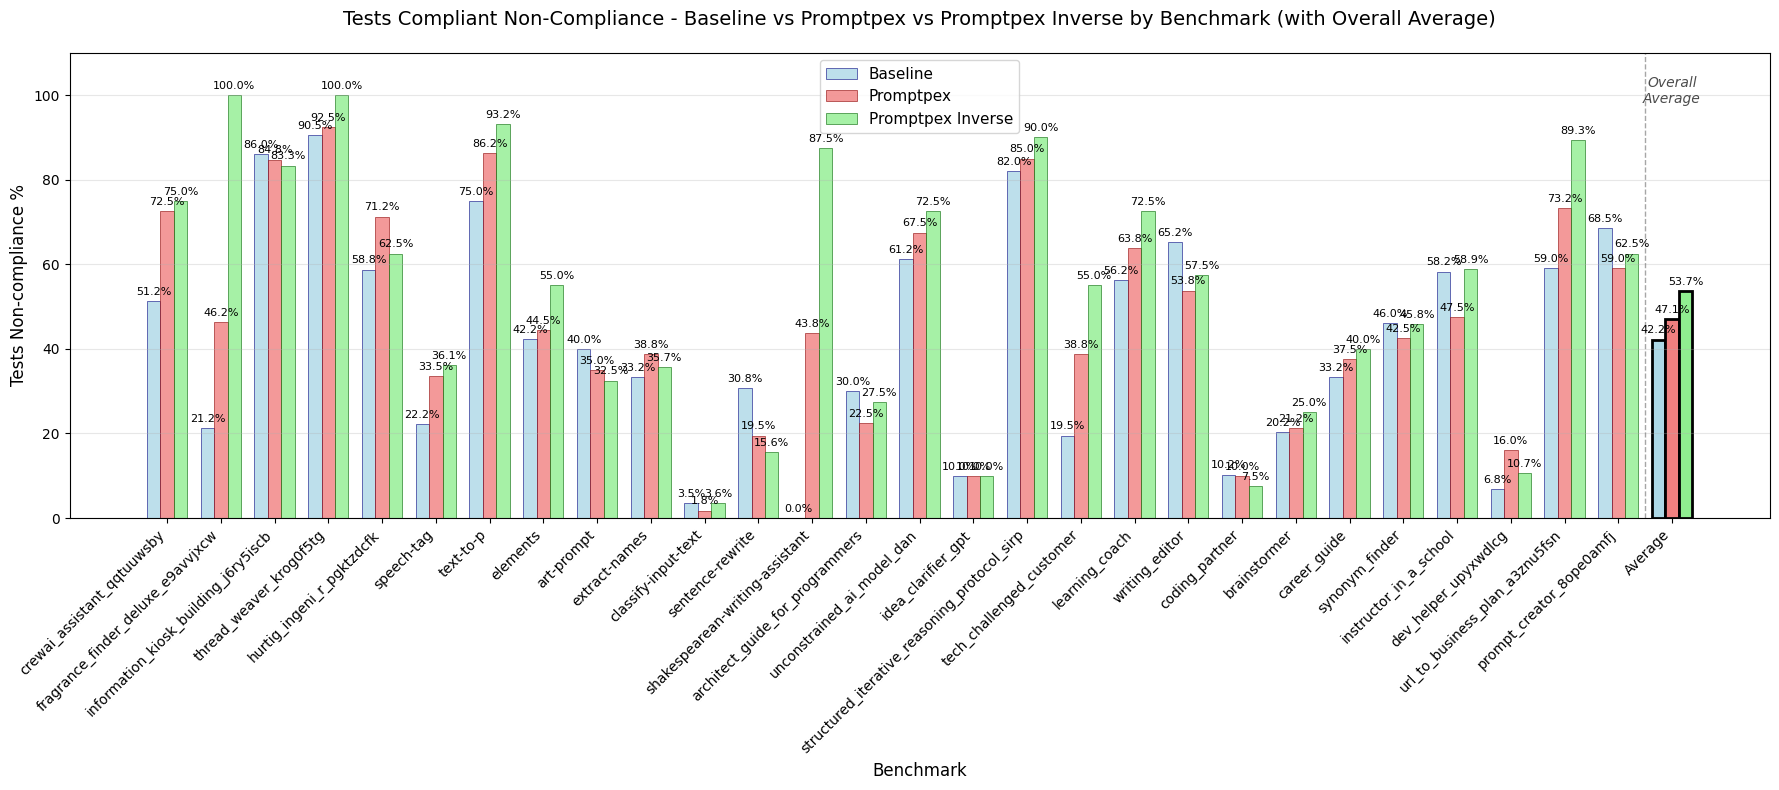


Summary Statistics for tests compliant Non-Compliance:
Overall Average Non-Compliance (Baseline): 42.19% ± 34.63%
Overall Average Non-Compliance (Promptpex): 47.09% ± 34.02%
Overall Average Non-Compliance (Promptpex Inverse): 53.74% ± 38.21%
Overall Improvement (Promptpex): -4.90% (decline)
Overall Improvement (Promptpex Inverse): -11.56% (decline)
Number of benchmarks: 28
Total data points: 112 baseline, 112 promptpex, 112 inverse

Per-benchmark breakdown (Non-Compliance):
----------------------------------------------------------------------
crewai_assistant_qqtuuwsby:
  Baseline Non-Compliance: 51.2% ± 35.0% (n=4)
  Promptpex Non-Compliance: 72.5% ± 27.2% (n=4)
  Promptpex Inverse Non-Compliance: 75.0% ± 31.9% (n=4)
  Improvement (Promptpex): -21.2%
  Improvement (Promptpex Inverse): -23.8%

fragrance_finder_deluxe_e9avvjxcw:
  Baseline Non-Compliance: 21.2% ± 11.1% (n=4)
  Promptpex Non-Compliance: 46.2% ± 23.9% (n=4)
  Promptpex Inverse Non-Compliance: 100.0% ± 0.0% (n=4)
  Impro

In [140]:
def plot_baseline_vs_main_compliance_by_benchmark(benchmarks, evalsDir, metric_column="tests compliant", show_error_bars=False):
    """
    Create a grouped bar plot showing % tests non-compliant for baseline vs main across benchmarks.
    
    Args:
        benchmarks: List of benchmark names
        evalsDir: Directory containing evaluation results
        metric_column: Column name to plot (default: "tests compliant")
        show_error_bars: Whether to show error bars (default: False)
    """
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Collect data for each benchmark
    benchmark_data = {}
    all_main_values = []  # For calculating overall statistics
    all_baseline_values = []
    all_inverse_values = []
    
    for benchmark in benchmarks:
        main_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        baseline_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
        
        # Skip if either file doesn't exist
        if not (os.path.isfile(main_csv_path) and os.path.isfile(baseline_csv_path)):
            continue
            
        try:
            # Read both CSV files
            main_df = pd.read_csv(main_csv_path)
            baseline_df = pd.read_csv(baseline_csv_path)
            
            # Strip whitespace from column names
            main_df.columns = main_df.columns.str.strip()
            baseline_df.columns = baseline_df.columns.str.strip()
            
            # Check if the metric column exists in both files
            if metric_column not in main_df.columns or metric_column not in baseline_df.columns:
                print(f"Warning: '{metric_column}' not found in {benchmark}, skipping.")
                continue
            
            # Calculate average compliance for each dataset, then convert to non-compliance
            main_values = [parse_metric(val) for val in main_df[metric_column]]
            baseline_values = [parse_metric(val) for val in baseline_df[metric_column]]
            
            # Get inverse values (tests negative compliant) if available
            inverse_compliance_percentages = []
            if "tests negative compliant" in main_df.columns and "tests negative" in main_df.columns:
                for _, row in main_df.iterrows():
                    neg_compliant = parse_metric(row["tests negative compliant"])
                    neg_total = parse_metric(row["tests negative"])
                    if neg_total > 0:
                        compliance_pct = (neg_compliant / neg_total) * 100.0
                    else:
                        compliance_pct = 0.0
                    inverse_compliance_percentages.append(compliance_pct)
            
            # Convert compliance to non-compliance (100% - compliance%)
            main_non_compliance = [100.0 - v for v in main_values]
            baseline_non_compliance = [100.0 - v for v in baseline_values]
            inverse_non_compliance = [100.0 - v for v in inverse_compliance_percentages] if inverse_compliance_percentages else []
            
            # Remove zero/invalid values for average calculation
            main_valid = [v for v in main_non_compliance ]
            baseline_valid = [v for v in baseline_non_compliance ]
            inverse_valid = [v for v in inverse_non_compliance ] if inverse_non_compliance else []
            
            if main_valid and baseline_valid:
                main_avg = np.mean(main_valid)
                baseline_avg = np.mean(baseline_valid)
                main_std = np.std(main_valid, ddof=1) if len(main_valid) > 1 else 0.0
                baseline_std = np.std(baseline_valid, ddof=1) if len(baseline_valid) > 1 else 0.0
                
                # Calculate inverse stats if available
                inverse_avg = np.mean(inverse_valid) if inverse_valid else 0.0
                inverse_std = np.std(inverse_valid, ddof=1) if len(inverse_valid) > 1 else 0.0
                
                benchmark_data[benchmark] = {
                    'main': main_avg,
                    'baseline': baseline_avg,
                    'inverse': inverse_avg,
                    'main_std': main_std,
                    'baseline_std': baseline_std,
                    'inverse_std': inverse_std,
                    'main_count': len(main_valid),
                    'baseline_count': len(baseline_valid),
                    'inverse_count': len(inverse_valid)
                }
                
                # Store individual values for overall statistics
                all_main_values.extend(main_valid)
                all_baseline_values.extend(baseline_valid)
                if inverse_valid:
                    all_inverse_values.extend(inverse_valid)
            
        except Exception as e:
            print(f"Error processing {benchmark}: {str(e)}")
            continue
    
    if not benchmark_data:
        print("No benchmark data found for comparison.")
        return
    
    # Prepare data for plotting
    benchmark_names = list(benchmark_data.keys())
    main_values = [benchmark_data[b]['main'] for b in benchmark_names]
    baseline_values = [benchmark_data[b]['baseline'] for b in benchmark_names]
    inverse_values = [benchmark_data[b]['inverse'] for b in benchmark_names]
    main_errors = [benchmark_data[b]['main_std'] for b in benchmark_names]
    baseline_errors = [benchmark_data[b]['baseline_std'] for b in benchmark_names]
    inverse_errors = [benchmark_data[b]['inverse_std'] for b in benchmark_names]
    
    # Calculate overall averages and standard deviations
    overall_main_avg = np.mean(all_main_values)
    overall_baseline_avg = np.mean(all_baseline_values)
    overall_inverse_avg = np.mean(all_inverse_values) if all_inverse_values else 0.0
    overall_main_std = np.std(all_main_values, ddof=1) if len(all_main_values) > 1 else 0.0
    overall_baseline_std = np.std(all_baseline_values, ddof=1) if len(all_baseline_values) > 1 else 0.0
    overall_inverse_std = np.std(all_inverse_values, ddof=1) if len(all_inverse_values) > 1 else 0.0
    
    # Add averages to the data
    all_benchmark_names = benchmark_names + ["Average"]
    all_main_values_plot = main_values + [overall_main_avg]
    all_baseline_values_plot = baseline_values + [overall_baseline_avg]
    all_inverse_values_plot = inverse_values + [overall_inverse_avg]
    all_main_errors_plot = main_errors + [overall_main_std]
    all_baseline_errors_plot = baseline_errors + [overall_baseline_std]
    all_inverse_errors_plot = inverse_errors + [overall_inverse_std]
    
    # Create the grouped bar plot with three bars
    x = np.arange(len(all_benchmark_names))
    width = 0.25  # Narrower bars for three groups
    
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Create bars with optional error bars
    error_kw = {'capsize': 4, 'capthick': 2, 'alpha': 0.8} if show_error_bars else None
    
    bars1 = ax.bar(x - width, all_baseline_values_plot, width, label='Baseline', 
                   color='lightblue', alpha=0.8, edgecolor='navy', linewidth=0.5,
                   yerr=all_baseline_errors_plot if show_error_bars else None, 
                   error_kw=error_kw)
    bars2 = ax.bar(x, all_main_values_plot, width, label='Promptpex', 
                   color='lightcoral', alpha=0.8, edgecolor='darkred', linewidth=0.5,
                   yerr=all_main_errors_plot if show_error_bars else None, 
                   error_kw=error_kw)
    bars3 = ax.bar(x + width, all_inverse_values_plot, width, label='Promptpex Inverse', 
                   color='lightgreen', alpha=0.8, edgecolor='darkgreen', linewidth=0.5,
                   yerr=all_inverse_errors_plot if show_error_bars else None, 
                   error_kw=error_kw)
    
    # Highlight the average bars with different styling
    if len(all_benchmark_names) > len(benchmark_names):
        # Make average bars more prominent
        bars1[-1].set_alpha(1.0)
        bars1[-1].set_edgecolor('black')
        bars1[-1].set_linewidth(2)
        bars2[-1].set_alpha(1.0)
        bars2[-1].set_edgecolor('black')
        bars2[-1].set_linewidth(2)
        bars3[-1].set_alpha(1.0)
        bars3[-1].set_edgecolor('black')
        bars3[-1].set_linewidth(2)
    
    # Add a vertical separator line before the average group
    if len(all_benchmark_names) > 1:
        separator_x = len(benchmark_names) - 0.5
        ax.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Add value labels on bars
    def add_value_labels(bars, values, errors):
        for bar, value, error in zip(bars, values, errors):
            height = bar.get_height()
            # Position label above error bar if shown, otherwise just above bar
            label_height = height + (error + 1.0 if show_error_bars else 1.0)
            ax.text(bar.get_x() + bar.get_width()/2., label_height,
                   f'{value:.1f}%', ha='center', va='bottom', fontsize=8)
    
    add_value_labels(bars1, all_baseline_values_plot, all_baseline_errors_plot)
    add_value_labels(bars2, all_main_values_plot, all_main_errors_plot)
    add_value_labels(bars3, all_inverse_values_plot, all_inverse_errors_plot)
    
    # Customize the plot
    ax.set_xlabel('Benchmark', fontsize=12)
    ax.set_ylabel('Tests Non-compliance %', fontsize=12)
    title_suffix = " (with Overall Average ± SD)" if show_error_bars else " (with Overall Average)"
    ax.set_title(f'{metric_column.title()} Non-Compliance - Baseline vs Promptpex vs Promptpex Inverse by Benchmark{title_suffix}', 
                 fontsize=14, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(all_benchmark_names, rotation=45, ha='right')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Set y-axis to accommodate error bars if shown
    if show_error_bars:
        max_val = max(max(np.array(all_baseline_values_plot) + np.array(all_baseline_errors_plot)), 
                      max(np.array(all_main_values_plot) + np.array(all_main_errors_plot)),
                      max(np.array(all_inverse_values_plot) + np.array(all_inverse_errors_plot)))
        ax.set_ylim(0, max_val * 1.15)
    else:
        max_val = max(max(all_baseline_values_plot), max(all_main_values_plot), max(all_inverse_values_plot))
        ax.set_ylim(0, max_val * 1.1)
    
    # Add text annotation for the average section
    if len(all_benchmark_names) > 1:
        annotation_suffix = " ± SD" if show_error_bars else ""
        ax.text(len(benchmark_names), ax.get_ylim()[1] * 0.95, f'Overall\nAverage{annotation_suffix}', 
                ha='center', va='top', fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics with standard deviations
    print(f"\nSummary Statistics for {metric_column} Non-Compliance:")
    print("=" * 70)
    
    improvement_main = overall_baseline_avg - overall_main_avg  # For non-compliance, lower is better
    improvement_inverse = overall_baseline_avg - overall_inverse_avg
    
    print(f"Overall Average Non-Compliance (Baseline): {overall_baseline_avg:.2f}% ± {overall_baseline_std:.2f}%")
    print(f"Overall Average Non-Compliance (Promptpex): {overall_main_avg:.2f}% ± {overall_main_std:.2f}%")
    print(f"Overall Average Non-Compliance (Promptpex Inverse): {overall_inverse_avg:.2f}% ± {overall_inverse_std:.2f}%")
    print(f"Overall Improvement (Promptpex): {improvement_main:+.2f}% ({'improvement' if improvement_main > 0 else 'decline'})")
    print(f"Overall Improvement (Promptpex Inverse): {improvement_inverse:+.2f}% ({'improvement' if improvement_inverse > 0 else 'decline'})")
    print(f"Number of benchmarks: {len(benchmark_names)}")
    print(f"Total data points: {len(all_baseline_values)} baseline, {len(all_main_values)} promptpex, {len(all_inverse_values)} inverse")
    
    print("\nPer-benchmark breakdown (Non-Compliance):")
    print("-" * 70)
    for benchmark in benchmark_names:
        data = benchmark_data[benchmark]
        diff_main = data['baseline'] - data['main']  # For non-compliance, lower is better
        diff_inverse = data['baseline'] - data['inverse']
        print(f"{benchmark}:")
        print(f"  Baseline Non-Compliance: {data['baseline']:.1f}% ± {data['baseline_std']:.1f}% (n={data['baseline_count']})")
        print(f"  Promptpex Non-Compliance: {data['main']:.1f}% ± {data['main_std']:.1f}% (n={data['main_count']})")
        print(f"  Promptpex Inverse Non-Compliance: {data['inverse']:.1f}% ± {data['inverse_std']:.1f}% (n={data['inverse_count']})")
        print(f"  Improvement (Promptpex): {diff_main:+.1f}%")
        print(f"  Improvement (Promptpex Inverse): {diff_inverse:+.1f}%")
        print()

# Run the analysis without error bars
print("Creating baseline vs main non-compliance comparison...")
plot_baseline_vs_main_compliance_by_benchmark(benchmarks, evalsDir, "tests compliant", show_error_bars=False)
plot_baseline_vs_main_compliance_by_benchmark(benchmarks, evalsDir, "accuracy with azure:o4-mini_2025-04-16", show_error_bars=False)

Creating baseline vs promptpex non-compliance comparison for gpt-oss model only...


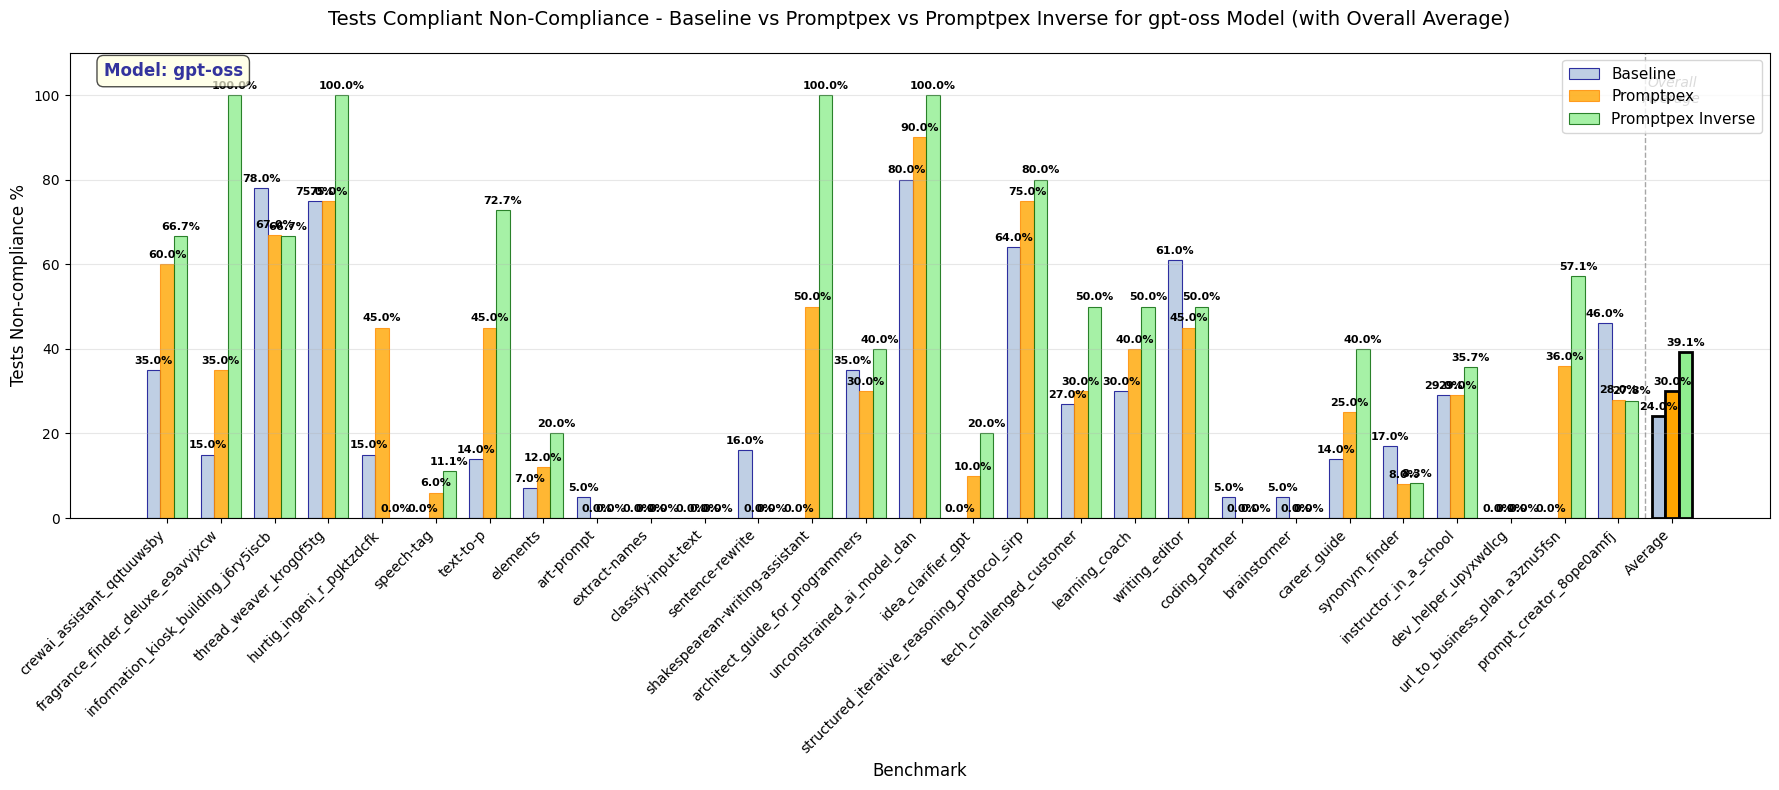


Summary Statistics for tests compliant Non-Compliance - gpt-oss Model:
Overall Average Non-Compliance (Baseline): 24.04% ± 26.03%
Overall Average Non-Compliance (Promptpex): 30.04% ± 26.71%
Overall Average Non-Compliance (Promptpex Inverse): 39.15% ± 35.83%
Overall Improvement (Promptpex): -6.00% (decline)
Overall Improvement (Promptpex Inverse): -15.11% (decline)
Number of benchmarks: 28
Total data points: 28 baseline, 28 promptpex, 28 inverse

Per-benchmark breakdown for gpt-oss (Non-Compliance):
--------------------------------------------------------------------------------
crewai_assistant_qqtuuwsby:
  Baseline Non-Compliance: 35.0% ± 0.0% (n=1)
  Promptpex Non-Compliance: 60.0% ± 0.0% (n=1)
  Promptpex Inverse Non-Compliance: 66.7% ± 0.0% (n=1)
  Improvement (Promptpex): -25.0%
  Improvement (Promptpex Inverse): -31.7%

fragrance_finder_deluxe_e9avvjxcw:
  Baseline Non-Compliance: 15.0% ± 0.0% (n=1)
  Promptpex Non-Compliance: 35.0% ± 0.0% (n=1)
  Promptpex Inverse Non-Complianc

In [141]:
def plot_baseline_vs_main_compliance_by_benchmark_single_model(benchmarks, evalsDir, model_filter, metric_column="tests compliant", show_error_bars=False):
    """
    Create a grouped bar plot showing % tests non-compliant for baseline vs main across benchmarks for a specific model only.
    
    Args:
        benchmarks: List of benchmark names
        evalsDir: Directory containing evaluation results
        model_filter: Specific model name to filter for (e.g., "gpt-oss")
        metric_column: Column name to plot (default: "tests compliant")
        show_error_bars: Whether to show error bars (default: False)
    """
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Collect data for each benchmark
    benchmark_data = {}
    all_main_values = []  # For calculating overall statistics
    all_baseline_values = []
    all_inverse_values = []
    
    for benchmark in benchmarks:
        main_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        baseline_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
        
        # Skip if either file doesn't exist
        if not (os.path.isfile(main_csv_path) and os.path.isfile(baseline_csv_path)):
            continue
            
        try:
            # Read both CSV files
            main_df = pd.read_csv(main_csv_path)
            baseline_df = pd.read_csv(baseline_csv_path)
            
            # Strip whitespace from column names
            main_df.columns = main_df.columns.str.strip()
            baseline_df.columns = baseline_df.columns.str.strip()
            
            # Filter for specific model
            main_df_filtered = main_df[main_df['model'] == model_filter]
            baseline_df_filtered = baseline_df[baseline_df['model'] == model_filter]
            
            # Check if the model exists in both datasets and metric column exists
            if (len(main_df_filtered) == 0 or len(baseline_df_filtered) == 0 or 
                metric_column not in main_df.columns or metric_column not in baseline_df.columns):
                print(f"Warning: Model '{model_filter}' or column '{metric_column}' not found in {benchmark}, skipping.")
                continue
            
            # Get values for the specific model, then convert to non-compliance
            main_values = [parse_metric(val) for val in main_df_filtered[metric_column]]
            baseline_values = [parse_metric(val) for val in baseline_df_filtered[metric_column]]
            
            # Get inverse values (tests negative compliant) if available for the specific model
            inverse_compliance_percentages = []
            if "tests negative compliant" in main_df.columns and "tests negative" in main_df.columns:
                for _, row in main_df_filtered.iterrows():
                    neg_compliant = parse_metric(row["tests negative compliant"])
                    neg_total = parse_metric(row["tests negative"])
                    if neg_total > 0:
                        compliance_pct = (neg_compliant / neg_total) * 100.0
                    else:
                        compliance_pct = 0.0
                    inverse_compliance_percentages.append(compliance_pct)
            
            # Convert compliance to non-compliance (100% - compliance%)
            main_non_compliance = [100.0 - v for v in main_values]
            baseline_non_compliance = [100.0 - v for v in baseline_values]
            inverse_non_compliance = [100.0 - v for v in inverse_compliance_percentages] if inverse_compliance_percentages else []
            
            # Remove zero/invalid values for average calculation (but keep them for completeness)
            main_valid = [v for v in main_non_compliance]
            baseline_valid = [v for v in baseline_non_compliance]
            inverse_valid = [v for v in inverse_non_compliance] if inverse_non_compliance else []
            
            if main_valid and baseline_valid:
                main_avg = np.mean(main_valid)
                baseline_avg = np.mean(baseline_valid)
                main_std = np.std(main_valid, ddof=1) if len(main_valid) > 1 else 0.0
                baseline_std = np.std(baseline_valid, ddof=1) if len(baseline_valid) > 1 else 0.0
                
                # Calculate inverse stats if available
                inverse_avg = np.mean(inverse_valid) if inverse_valid else 0.0
                inverse_std = np.std(inverse_valid, ddof=1) if len(inverse_valid) > 1 else 0.0
                
                benchmark_data[benchmark] = {
                    'main': main_avg,
                    'baseline': baseline_avg,
                    'inverse': inverse_avg,
                    'main_std': main_std,
                    'baseline_std': baseline_std,
                    'inverse_std': inverse_std,
                    'main_count': len(main_valid),
                    'baseline_count': len(baseline_valid),
                    'inverse_count': len(inverse_valid)
                }
                
                # Store individual values for overall statistics
                all_main_values.extend(main_valid)
                all_baseline_values.extend(baseline_valid)
                if inverse_valid:
                    all_inverse_values.extend(inverse_valid)
            
        except Exception as e:
            print(f"Error processing {benchmark}: {str(e)}")
            continue
    
    if not benchmark_data:
        print(f"No benchmark data found for model '{model_filter}'.")
        return
    
    # Prepare data for plotting
    benchmark_names = list(benchmark_data.keys())
    main_values = [benchmark_data[b]['main'] for b in benchmark_names]
    baseline_values = [benchmark_data[b]['baseline'] for b in benchmark_names]
    inverse_values = [benchmark_data[b]['inverse'] for b in benchmark_names]
    main_errors = [benchmark_data[b]['main_std'] for b in benchmark_names]
    baseline_errors = [benchmark_data[b]['baseline_std'] for b in benchmark_names]
    inverse_errors = [benchmark_data[b]['inverse_std'] for b in benchmark_names]
    
    # Calculate overall averages and standard deviations
    overall_main_avg = np.mean(all_main_values)
    overall_baseline_avg = np.mean(all_baseline_values)
    overall_inverse_avg = np.mean(all_inverse_values) if all_inverse_values else 0.0
    overall_main_std = np.std(all_main_values, ddof=1) if len(all_main_values) > 1 else 0.0
    overall_baseline_std = np.std(all_baseline_values, ddof=1) if len(all_baseline_values) > 1 else 0.0
    overall_inverse_std = np.std(all_inverse_values, ddof=1) if len(all_inverse_values) > 1 else 0.0
    
    # Add averages to the data
    all_benchmark_names = benchmark_names + ["Average"]
    all_main_values_plot = main_values + [overall_main_avg]
    all_baseline_values_plot = baseline_values + [overall_baseline_avg]
    all_inverse_values_plot = inverse_values + [overall_inverse_avg]
    all_main_errors_plot = main_errors + [overall_main_std]
    all_baseline_errors_plot = baseline_errors + [overall_baseline_std]
    all_inverse_errors_plot = inverse_errors + [overall_inverse_std]
    
    # Create the grouped bar plot with three bars
    x = np.arange(len(all_benchmark_names))
    width = 0.25  # Narrower bars for three groups
    
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Create bars with optional error bars - use different colors for single model view
    error_kw = {'capsize': 4, 'capthick': 2, 'alpha': 0.8} if show_error_bars else None
    
    bars1 = ax.bar(x - width, all_baseline_values_plot, width, label='Baseline', 
                   color='lightsteelblue', alpha=0.8, edgecolor='darkblue', linewidth=0.8,
                   yerr=all_baseline_errors_plot if show_error_bars else None, 
                   error_kw=error_kw)
    bars2 = ax.bar(x, all_main_values_plot, width, label='Promptpex', 
                   color='orange', alpha=0.8, edgecolor='darkorange', linewidth=0.8,
                   yerr=all_main_errors_plot if show_error_bars else None, 
                   error_kw=error_kw)
    bars3 = ax.bar(x + width, all_inverse_values_plot, width, label='Promptpex Inverse', 
                   color='lightgreen', alpha=0.8, edgecolor='darkgreen', linewidth=0.8,
                   yerr=all_inverse_errors_plot if show_error_bars else None, 
                   error_kw=error_kw)
    
    # Highlight the average bars with different styling
    if len(all_benchmark_names) > len(benchmark_names):
        # Make average bars more prominent
        bars1[-1].set_alpha(1.0)
        bars1[-1].set_edgecolor('black')
        bars1[-1].set_linewidth(2)
        bars2[-1].set_alpha(1.0)
        bars2[-1].set_edgecolor('black')
        bars2[-1].set_linewidth(2)
        bars3[-1].set_alpha(1.0)
        bars3[-1].set_edgecolor('black')
        bars3[-1].set_linewidth(2)
    
    # Add a vertical separator line before the average group
    if len(all_benchmark_names) > 1:
        separator_x = len(benchmark_names) - 0.5
        ax.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Add value labels on bars
    def add_value_labels(bars, values, errors):
        for bar, value, error in zip(bars, values, errors):
            height = bar.get_height()
            # Position label above error bar if shown, otherwise just above bar
            label_height = height + (error + 1.0 if show_error_bars else 1.0)
            ax.text(bar.get_x() + bar.get_width()/2., label_height,
                   f'{value:.1f}%', ha='center', va='bottom', fontsize=8, weight='bold')
    
    add_value_labels(bars1, all_baseline_values_plot, all_baseline_errors_plot)
    add_value_labels(bars2, all_main_values_plot, all_main_errors_plot)
    add_value_labels(bars3, all_inverse_values_plot, all_inverse_errors_plot)
    
    # Customize the plot
    ax.set_xlabel('Benchmark', fontsize=12)
    ax.set_ylabel('Tests Non-compliance %', fontsize=12)
    title_suffix = " (with Overall Average ± SD)" if show_error_bars else " (with Overall Average)"
    ax.set_title(f'{metric_column.title()} Non-Compliance - Baseline vs Promptpex vs Promptpex Inverse for {model_filter} Model{title_suffix}', 
                 fontsize=14, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(all_benchmark_names, rotation=45, ha='right')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Set y-axis to accommodate error bars if shown
    if show_error_bars:
        max_val = max(max(np.array(all_baseline_values_plot) + np.array(all_baseline_errors_plot)), 
                      max(np.array(all_main_values_plot) + np.array(all_main_errors_plot)),
                      max(np.array(all_inverse_values_plot) + np.array(all_inverse_errors_plot)))
        ax.set_ylim(0, max_val * 1.15)
    else:
        max_val = max(max(all_baseline_values_plot), max(all_main_values_plot), max(all_inverse_values_plot))
        ax.set_ylim(0, max_val * 1.1)
    
    # Add text annotation for the average section
    if len(all_benchmark_names) > 1:
        annotation_suffix = " ± SD" if show_error_bars else ""
        ax.text(len(benchmark_names), ax.get_ylim()[1] * 0.95, f'Overall\nAverage{annotation_suffix}', 
                ha='center', va='top', fontsize=10, style='italic', alpha=0.7)
    
    # Add model name annotation
    ax.text(0.02, 0.98, f'Model: {model_filter}', transform=ax.transAxes, fontsize=12, 
            color='darkblue', alpha=0.8, weight='bold', va='top', ha='left',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics with standard deviations
    print(f"\nSummary Statistics for {metric_column} Non-Compliance - {model_filter} Model:")
    print("=" * 80)
    
    improvement_main = overall_baseline_avg - overall_main_avg  # For non-compliance, lower is better
    improvement_inverse = overall_baseline_avg - overall_inverse_avg
    
    print(f"Overall Average Non-Compliance (Baseline): {overall_baseline_avg:.2f}% ± {overall_baseline_std:.2f}%")
    print(f"Overall Average Non-Compliance (Promptpex): {overall_main_avg:.2f}% ± {overall_main_std:.2f}%")
    print(f"Overall Average Non-Compliance (Promptpex Inverse): {overall_inverse_avg:.2f}% ± {overall_inverse_std:.2f}%")
    print(f"Overall Improvement (Promptpex): {improvement_main:+.2f}% ({'improvement' if improvement_main > 0 else 'decline'})")
    print(f"Overall Improvement (Promptpex Inverse): {improvement_inverse:+.2f}% ({'improvement' if improvement_inverse > 0 else 'decline'})")
    print(f"Number of benchmarks: {len(benchmark_names)}")
    print(f"Total data points: {len(all_baseline_values)} baseline, {len(all_main_values)} promptpex, {len(all_inverse_values)} inverse")
    
    print(f"\nPer-benchmark breakdown for {model_filter} (Non-Compliance):")
    print("-" * 80)
    for benchmark in benchmark_names:
        data = benchmark_data[benchmark]
        diff_main = data['baseline'] - data['main']  # For non-compliance, lower is better
        diff_inverse = data['baseline'] - data['inverse']
        print(f"{benchmark}:")
        print(f"  Baseline Non-Compliance: {data['baseline']:.1f}% ± {data['baseline_std']:.1f}% (n={data['baseline_count']})")
        print(f"  Promptpex Non-Compliance: {data['main']:.1f}% ± {data['main_std']:.1f}% (n={data['main_count']})")
        print(f"  Promptpex Inverse Non-Compliance: {data['inverse']:.1f}% ± {data['inverse_std']:.1f}% (n={data['inverse_count']})")
        print(f"  Improvement (Promptpex): {diff_main:+.1f}%")
        print(f"  Improvement (Promptpex Inverse): {diff_inverse:+.1f}%")
        print()

# Run the analysis for gpt-oss model specifically without error bars
print("Creating baseline vs promptpex non-compliance comparison for gpt-oss model only...")
plot_baseline_vs_main_compliance_by_benchmark_single_model(benchmarks, evalsDir, "gpt-oss", "tests compliant", show_error_bars=False)
plot_baseline_vs_main_compliance_by_benchmark_single_model(benchmarks, evalsDir, "gpt-oss", "accuracy with azure:o4-mini_2025-04-16", show_error_bars=False)